# <font color='056938'>**Caso de estudio - Parte II**

**Grupo 3:**
* Ximena Castañeda Ruiz
* Sara Sandoval Alvarez
* Catalina Betancur Higuita
* Juan Manuel Arredondo

# **Librerias Necesarias**

In [ ]:
# instalar paquete para BayesSearchCV
!pip install scikit-optimizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import math as mt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif ,f_regression, mutual_info_regression, chi2
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import time
from scipy.stats import uniform, poisson
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import joblib
from matplotlib import style

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)

## **Cargar base de datos**

En esta sección cargamos el dataset previamente procesado desde Google Drive y lo guardamos en un DataFrame de trabajo llamado X_final. Esto nos permitirá tener una copia limpia para aplicar los siguientes pasos

In [ ]:
file_id_1 = '12fh4NMlOJS5lk3JPoIjNbSujXseLdnue'
df_procesado = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id_1}', sep=',', low_memory=False)
X_final = df_procesado.copy()

In [ ]:
X_final.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Other1,JobRole_Commercial,JobRole_Human Resources,JobRole_Management,JobRole_Scientific_Technical,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,1,1,131160,1.0,0,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,6.8702,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False
1,31,1,10,1,1,2,1,1,41890,0.0,0,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.3160,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,True
2,32,0,17,4,1,3,0,4,193280,1.0,0,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,6.8161,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True,False
3,38,0,2,5,1,4,0,3,83210,3.0,0,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,6.7892,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False
4,32,0,10,1,1,5,0,1,23420,4.0,0,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,7.8776,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,True


# <font color='blue'> **Selección de variables**

El conjunto de datos contiene un gran número de variables que pueden incluir redundancia o poca relevancia para explicar la variable objetivo (Attrition).
Por ello, se aplican métodos de selección de características que permiten:

* Reducir la dimensionalidad del dataset.

* Eliminar ruido y variables poco informativas.

* Mejorar la interpretabilidad del modelo.

* Incrementar la eficiencia computacional y la precisión de los algoritmos de predicción.

## **Normalización de Variables con MinMaxScaler**

Para que todas las variables estén en la misma escala y no influyan desproporcionadamente en los métodos de selección, aplicamos Min-Max Scaling, que transforma los datos al rango
[0,1].

In [ ]:
scaler = MinMaxScaler()
X_final = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)

X_final.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Other1,JobRole_Commercial,JobRole_Human Resources,JobRole_Management,JobRole_Scientific_Technical,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.785714,0.0,0.178571,0.25,0.0,0.000000,1.0,0.00,0.637546,0.111111,0.0,0.000000,0.0,0.000000,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0,0.263260,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.309524,1.0,0.321429,0.00,0.0,0.000227,1.0,0.00,0.167457,0.000000,0.0,0.857143,0.0,0.333333,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0,0.344015,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.333333,0.0,0.571429,0.75,0.0,0.000454,0.0,0.75,0.964666,0.111111,0.0,0.285714,0.0,1.000000,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0,0.253460,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.476190,0.0,0.035714,1.00,0.0,0.000680,0.0,0.50,0.385045,0.333333,0.0,0.000000,0.0,1.000000,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0,0.248587,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,0.0,0.321429,0.00,0.0,0.000907,0.0,0.00,0.070195,0.444444,0.0,0.071429,0.0,0.666667,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0,0.445747,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## **MÉTODOS DE FILTRADO**

Los métodos de filtrado evalúan la relevancia estadística de cada variable de manera independiente respecto a la variable objetivo.

La selección no depende de ningún algoritmo de aprendizaje automático. Es más rápido y, por lo general, el mejor
enfoque cuando la cantidad de variables es enorme.
Evita el sobreajuste, pero a veces puede fallar al seleccionar las mejores características.

**Preparación de variables para la selección**

Antes de aplicar los métodos de filtrado, separamos las variables en:

Variable objetivo (Attrition) → indica si un empleado renuncia o permanece en la empresa.

Variables independientes (x_int) → todas las demás variables numéricas que podrían explicar el comportamiento de la variable objetivo.

Se decidió eliminar las variables `EmployeeID, EmployeeCount, StandardHours y Over18`, dado que corresponden a atributos constantes que no aportan variabilidad al modelo. De esta manera, se evita introducir ruido o redundancia en el análisis, garantizando que únicamente se consideren características con capacidad explicativa real en la predicción.

In [ ]:
x_int = X_final.select_dtypes(include = ["number"]) # filtrar solo variables númericas
y = X_final['Attrition'] # variable respuesta
# Lista de variables a eliminar ( la objetivo y las constantes)
cols_a_eliminar = ['Attrition',"EmployeeID","EmployeeCount","StandardHours","Over18"]
# Eliminar columnas
x_int = x_int.drop(cols_a_eliminar, axis=1)
x_int.head() # variables independientes númericas

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Other1,JobRole_Commercial,JobRole_Human Resources,JobRole_Management,JobRole_Scientific_Technical,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.785714,0.178571,0.25,1.0,0.00,0.637546,0.111111,0.000000,0.000000,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0,0.263260,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.309524,0.321429,0.00,1.0,0.00,0.167457,0.000000,0.857143,0.333333,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0,0.344015,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.333333,0.571429,0.75,0.0,0.75,0.964666,0.111111,0.285714,1.000000,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0,0.253460,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.476190,0.035714,1.00,0.0,0.50,0.385045,0.333333,0.000000,1.000000,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0,0.248587,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,0.321429,0.00,0.0,0.00,0.070195,0.444444,0.071429,0.666667,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0,0.445747,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_int.dtypes

,0
Age,float64
DistanceFromHome,float64
Education,float64
Gender,float64
JobLevel,float64
MonthlyIncome,float64
NumCompaniesWorked,float64
PercentSalaryHike,float64
StockOptionLevel,float64
TotalWorkingYears,float64


Con esto dejamos lista la base de variables candidatas que serán evaluadas con los diferentes métodos de filtrado.

In [ ]:
x_int.describe()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Other1,JobRole_Commercial,JobRole_Human Resources,JobRole_Management,JobRole_Scientific_Technical,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.450567,0.292590,0.478231,0.400000,0.265986,0.289307,0.299093,0.300680,0.264626,0.281933,0.466553,0.175204,0.145850,0.242537,0.575057,0.578005,0.587831,0.576644,0.153741,0.343718,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.412245,0.315646,0.272109,0.367347,0.035374,0.222449,0.374830,0.222449,0.457823,0.319728
std,0.217460,0.289465,0.255983,0.489954,0.276672,0.247861,0.277101,0.261365,0.283961,0.194362,0.214830,0.153128,0.214780,0.209843,0.363284,0.367357,0.234514,0.237133,0.360742,0.241064,0.302736,0.391104,0.454034,0.202558,0.475831,0.459779,0.492295,0.464825,0.445096,0.482137,0.184745,0.415938,0.484134,0.415938,0.498274,0.466424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.250000,0.000000,0.000000,0.100158,0.111111,0.071429,0.000000,0.150000,0.333333,0.075000,0.000000,0.117647,0.333333,0.333333,0.333333,0.333333,0.000000,0.156239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.214286,0.500000,0.000000,0.250000,0.205898,0.222222,0.214286,0.333333,0.250000,0.500000,0.125000,0.066667,0.176471,0.666667,0.666667,0.666667,0.666667,0.000000,0.288792,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.464286,0.750000,1.000000,0.500000,0.388152,0.444444,0.500000,0.333333,0.375000,0.500000,0.225000,0.200000,0.411765,1.000000,1.000000,0.666667,0.666667,0.000000,0.449940,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='orange'>**Variance Threshold (Umbral de variación)**

Esta técnica es una forma rápida y ligera de eliminar características
con una varianza muy baja, es decir, características con poca
información útil.
Una varianza baja indica que la variable apenas cambia entre observaciones, por lo que no aporta información útil al modelo.

In [ ]:
def variance_threshold(X, th):  # recibe el DataFrame y el umbral
    var_thres = VarianceThreshold(threshold=th)  # crea la función con base en el umbral
    var_thres.fit(X)  # alimenta los datos con la función creada
    new_cols = var_thres.get_support()  # devuelve True/False por cada columna
    return new_cols

In [ ]:
# Obtener columnas seleccionadas
# Parámetros para definir qué variables eliminar:
desviacion = 0.21   # umbral de desviación estándar mínima
varianza = desviacion**2  # varianza asociada

# Resultados
print('Desviación estandar:', mt.sqrt(varianza))
print('Varianza:', varianza)

# Aplicar filtro de varianza
x_new = variance_threshold(x_int, varianza)

# Crear nuevo DataFrame con solo las columnas que cumplen
df_VarianceThreshold = x_int.iloc[:, x_new]

# Ver las primeras filas
df_VarianceThreshold.head()

Desviación estandar: 0.21
Varianza: 0.04409999999999999


,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Other1,JobRole_Commercial,JobRole_Management,JobRole_Scientific_Technical,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.785714,0.178571,0.25,1.0,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0,0.263260,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.309524,0.321429,0.00,1.0,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,0.066667,0.666667,0.333333,1.000000,0.333333,1.0,0.344015,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.333333,0.571429,0.75,0.0,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.666667,0.0,0.253460,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.476190,0.035714,1.00,0.0,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,0.466667,1.000000,1.000000,0.666667,0.333333,0.0,0.248587,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,0.321429,0.00,0.0,0.00,0.070195,0.444444,0.071429,0.666667,0.333333,0.000000,1.000000,0.000000,0.666667,0.666667,0.0,0.445747,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Filtro de Varianza**

Threshold = 0.044

Se aplicó el método `VarianceThreshold`
para eliminar aquellas variables con una **desviación estándar menor a 0.21**
equivalente a una **varianza de 0.044**

- El nuevo DataFrame `df_VarianceThreshold` conserva únicamente las columnas que superan el umbral de varianza.  
- En este caso, todas las variables seleccionadas mantienen una variabilidad suficiente tras la normalización.  



In [ ]:
# Columnas originales
cols_original = x_int.columns

# Columnas retenidas
cols_retenidas = x_int.columns[x_new]

# Columnas eliminadas
cols_eliminadas = list(set(cols_original) - set(cols_retenidas))

print("Columnas retenidas:", len(cols_retenidas))
print(cols_retenidas.tolist())
print("\nColumnas eliminadas:", len(cols_eliminadas))
print(cols_eliminadas)

Columnas retenidas: 31
['Age', 'DistanceFromHome', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'mean_time', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other1', 'JobRole_Commercial', 'JobRole_Management', 'JobRole_Scientific_Technical', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']

Columnas eliminadas: 5
['YearsWithCurrManager', 'YearsAtCompany', 'Department_Human Resources', 'TotalWorkingYears', 'JobRole_Human Resources']


###  **Resultados**

Después de aplicar el umbral de varianza (0.044), se obtuvo la siguiente clasificación de variables:

- **Variables retenidas:**  -  presentan suficiente dispersión en sus valores, por lo que aportan información útil al modelo.  
  `'Age', 'DistanceFromHome', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'mean_time', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other1', 'JobRole_Commercial', 'JobRole_Management', 'JobRole_Scientific_Technical', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single' `

- **Variables eliminadas:**  mostraron baja variabilidad, lo que indica que no contribuyen de manera significativa en la predicción de la variable objetivo
  `'YearsWithCurrManager', 'TotalWorkingYears', 'YearsAtCompany', 'JobRole_Human Resources', 'Department_Human Resources' `

## <font color='orange'> **Univariate feature selection (selección univariante):**

La selección univariante es una técnica de filtrado que evalúa cada variable de manera independiente respecto a la variable objetivo. En este caso, se utiliza el estadístico de información mutua (mutual_info_classif), que mide el grado de dependencia entre las variables predictoras (numéricas o categóricas) y la variable respuesta categórica (Attrition).

In [ ]:
# Función para graficar scores de SelectKBest
def plot(metric, features, name):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.bar(np.arange(len(metric)), metric)
    ax.set_xticks(np.arange(len(metric)))
    ax.set_xticklabels(features, rotation=90)
    ax.set_ylabel(name)
    plt.title(f"SelectKBest - {name}")
    plt.show()

In [ ]:
# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k): #se establece una funcion que permite sacar varias funciones de evaluacion
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    scores = sel_kb.scores_
    pvalues = sel_kb.pvalues_
    new_cols = sel_kb.get_support()
    print("Scores:\n", scores, "\nP-values:\n", pvalues)
    return new_cols, scores, pvalues

***Revisión de valores nulos***


In [ ]:
df_univa = x_int.copy()

In [ ]:
df_univa.isnull().sum()

,0
Age,0
DistanceFromHome,0
Education,0
Gender,0
JobLevel,0
MonthlyIncome,0
NumCompaniesWorked,0
PercentSalaryHike,0
StockOptionLevel,0
TotalWorkingYears,0


- Todas las columnas presentan **0 valores nulos**.  
- Esto confirma que el tratamiento de datos faltantes realizado en la **Entrega 1** (mediana para
variables numéricas, moda para categóricas) fue exitoso.  

### **Selección univariante con información mutua**

Para identificar cuáles variables tienen mayor capacidad explicativa sobre la variable objetivo Attrition, se aplicó la técnica **SelectKBest** utilizando información mutua **(mutual_info_classif)**.

De las 40 variables independientes iniciales, se seleccionaron 15 mediante este método. Este número corresponde al 37.5% de las variables originales. Al priorizar aquellas con mayor puntuación de información mutua, se asegura que las variables elegidas compartan la mayor cantidad de dependencia posible con la variable objetivo (Attrition), sin asumir linealidad ni distribuciones específicas.

In [ ]:
x_new, scores, pvalues = select_kbest(x_int, y, lambda X, y: mutual_info_classif(X, y, random_state=12), 15) # para obtener el mismo resultado
df_Univariate = x_int.iloc[:,x_new] # Nuevo conjunto de datos
df_Univariate.head()

Scores:
 [3.89636243e-02 8.67602770e-04 7.33483081e-03 9.36743310e-04
 0.00000000e+00 9.17075179e-02 1.09392638e-02 0.00000000e+00
 6.29741522e-03 3.59008635e-02 0.00000000e+00 2.55579401e-02
 1.57295416e-02 2.79306796e-02 4.51525378e-03 8.73511542e-03
 1.14297889e-02 3.16793559e-04 6.12510942e-03 3.47977245e-02
 6.89173154e-05 1.01893378e-02 8.69809353e-03 7.26809379e-03
 1.54536678e-03 4.56130716e-04 5.08632553e-04 9.23735262e-03
 4.27619954e-03 1.20370728e-03 3.95934409e-03 1.47336216e-04
 6.22855920e-03 8.43079163e-03 0.00000000e+00 1.72175062e-02] 
P-values:
 None


,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Medical,MaritalStatus_Divorced,MaritalStatus_Single
0,0.785714,0.637546,0.111111,0.025,0.025,0.000000,0.000000,1.000000,0.333333,0.263260,0.0,1.0,0.0,0.0,0.0
1,0.309524,0.167457,0.000000,0.150,0.125,0.066667,0.235294,0.333333,1.000000,0.344015,1.0,0.0,0.0,0.0,1.0
2,0.333333,0.964666,0.111111,0.125,0.125,0.000000,0.176471,0.333333,0.000000,0.253460,1.0,0.0,0.0,0.0,0.0
3,0.476190,0.385045,0.333333,0.325,0.200,0.466667,0.294118,1.000000,0.666667,0.248587,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.070195,0.444444,0.225,0.150,0.000000,0.235294,0.000000,0.666667,0.445747,0.0,1.0,1.0,0.0,1.0


### **Resultados**

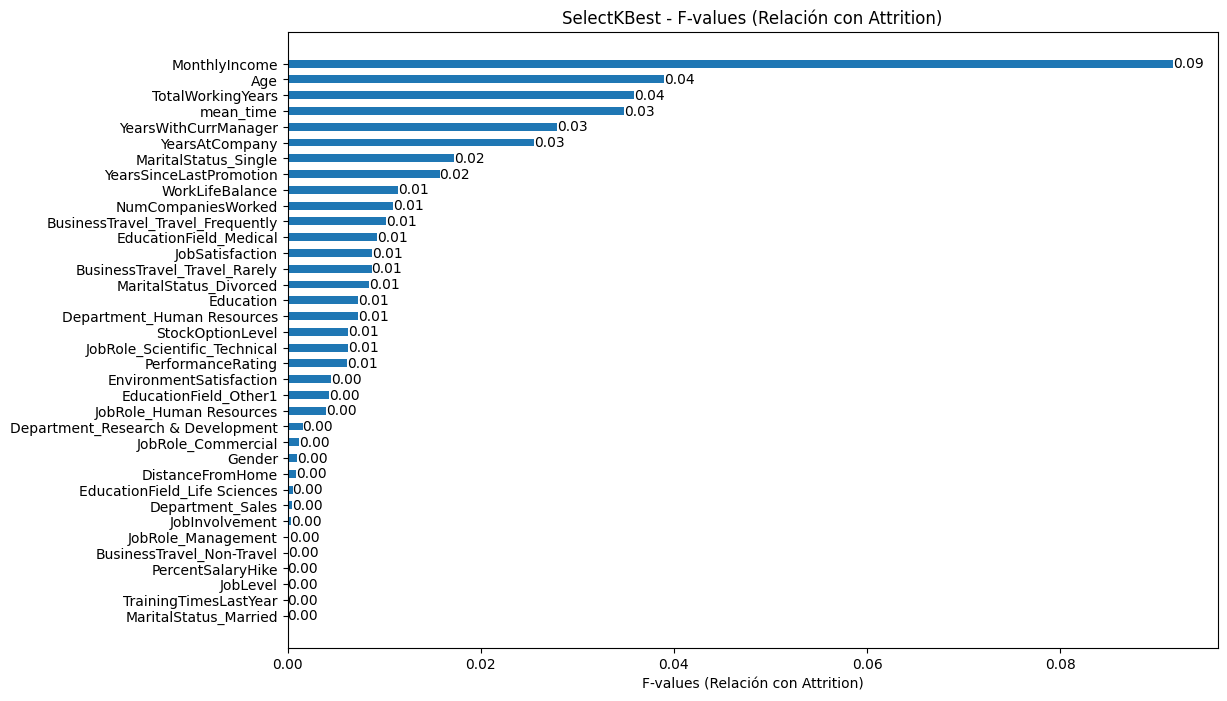

In [ ]:
# Graficar la relevancia de las variables frente a Attrition
def plot(metric, features, name):
    # Combinar scores y features en un DataFrame para ordenar
    feature_scores_df = pd.DataFrame({'Variable': features, 'Score': metric})
    feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False) # Ordenar de mayor a menor

    fig, ax = plt.subplots(figsize=(12,8)) # Aumentar el tamaño para mejor visualización
    bars = ax.barh(np.arange(len(feature_scores_df)), feature_scores_df['Score'],height=0.5) # Usar el DataFrame ordenado
    ax.set_yticks(np.arange(len(feature_scores_df))) # Usar set_yticks para gráfico horizontal
    ax.set_yticklabels(feature_scores_df['Variable']) # Usar set_yticklabels con las variables ordenadas
    ax.set_xlabel(name) # Cambiado a set_xlabel para gráfico horizontal
    plt.title(f"SelectKBest - {name}")
    plt.gca().invert_yaxis() # Invertir el eje y para que la variable con mayor score quede arriba

    # Añadir etiquetas de valor a cada barra
    for bar in bars:
        width = bar.get_width()
        label_text = f'{width:.2f}' # Formatear el valor a 2 decimales
        label_x_pos = width # Posición x de la etiqueta (al final de la barra)
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, label_text, va='center')

    plt.show()

plot(scores, x_int.columns, 'F-values (Relación con Attrition)')

Analizando las 15 variables más relevantes según ***mutual_info_classif*** para explicar la rotación (Attrition), se observa que los factores más determinantes son económicos, de experiencia y de antigüedad, seguidos por aspectos de vida personal y balance laboral.

Las variables con mayor score reflejan que el salario, la edad, la experiencia total, la permanencia con el gerente actual y el tiempo en la empresa son los principales determinantes de la rotación. El estado civil (solteros o divorciados), el tiempo desde la última promoción y el balance vida-trabajo aportan influencia intermedia. Variables de educación específica o viajes laborales muestran menor relevancia, pero siguen formando parte del top 15.

## **MÉTODOS WRAPPER**

### <font color='orange'> **RFE**


Se aplicó el método **RFE (Eliminación Recursiva de Características)** utilizando un modelo de **Regresión Logística** como estimador.  

- El resultado muestra qué columnas fueron retenidas (`True`) y el **ranking de importancia** asignado por el algoritmo.  
- Este ranking indica el orden de prioridad de cada variable en la predicción de **Attrition**.  


In [ ]:
# Función recursiva de selección de características
def recursive_feature_selection(X, y, model, k):  # model = estimador
    rfe = RFE(model, n_features_to_select=k, step=1)  # step=1 = eliminar una característica por iteración
    fit = rfe.fit(X, y)
    X_new = fit.support_
    print("Número de variables seleccionadas:", fit.n_features_)
    print("Variables seleccionadas (True=seleccionada):", fit.support_)
    print("Ranking de importancia:", fit.ranking_)
    return X_new

In [ ]:
model = LogisticRegression(max_iter=2000, solver="lbfgs")
selected_features = recursive_feature_selection(x_int, y, model, k=15)

Número de variables seleccionadas: 15
Variables seleccionadas (True=seleccionada): [ True False False False False False  True False False  True  True  True
  True  True  True  True  True False False  True  True  True False  True
 False False False False False False False False False False False  True]
Ranking de importancia: [ 1 21  7 16  8 11  1 15 10  1  1  1  1  1  1  1  1  9 22  1  1  1 20  1
  3  2 13 14 18  5 17 19  4  6 12  1]


In [ ]:
# Obtener nombres de las variables seleccionadas
selected_variable_names = x_int.columns[selected_features]
print("Variables seleccionadas:", list(selected_variable_names))

Variables seleccionadas: ['Age', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'mean_time', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'MaritalStatus_Single']


### **Resultados**

El ranking de importancia muestra que todas las variables seleccionadas obtuvieron un valor de 1, lo que indica que son los predictores más fuertes dentro del conjunto final. Cada una aporta información relevante al modelo, ayudando a capturar relaciones importantes que mejoran su capacidad predictiva.

En términos generales, la selección de estas variables (`'Age', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'mean_time', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'MaritalStatus_Single, 'MaritalStatus_Single'`) permite construir un modelo robusto y eficiente. Estas variables representan los factores más influyentes para la variable objetivo y proporcionan un conjunto de predictores confiables, asegurando un buen rendimiento sin incluir información redundante o irrelevante.

In [ ]:
# Crear un nuevo DataFrame con solo las variables seleccionadas
df_RFE = x_int[selected_variable_names]

# Ver las primeras filas
df_RFE.head()

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,MaritalStatus_Single
0,0.785714,0.111111,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.263260,0.0,0.0,0.0,0.0
1,0.309524,0.000000,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.344015,0.0,1.0,0.0,1.0
2,0.333333,0.111111,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.253460,0.0,1.0,0.0,0.0
3,0.476190,0.333333,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.248587,1.0,0.0,0.0,0.0
4,0.333333,0.444444,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.445747,0.0,0.0,0.0,1.0


# **Mejor método para selección de características**

Se compararon distintos métodos de selección de características (VarianceThreshold, Selección univariante y RFE).
Cada conjunto reducido de variables se usó para entrenar modelos de Regresión Logística.

                     Método        F1  Precisión    Recall  Accuracy
2                       RFE  0.486618   0.371747  0.704225  0.760771
1  Univariate (SelectKBest)  0.457275   0.340206  0.697183  0.733560
0         VarianceThreshold  0.454545   0.344203  0.669014  0.741497


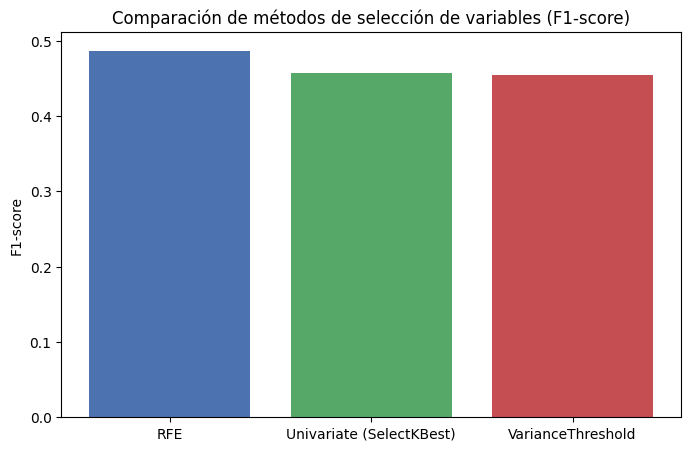

In [ ]:
# Diccionario con DataFrames ya creados
datasets = {
    "VarianceThreshold": df_VarianceThreshold,
    "Univariate (SelectKBest)": df_Univariate,
    "RFE": df_RFE}

results = []

# Evaluamos cada DataFrame con métricas simples
for name, X_sel in datasets.items():
    # Ajustar el split a las variables seleccionadas
    X_train, X_test, y_train, y_test = train_test_split(
        X_sel, y, test_size=0.2, random_state=42, stratify=y)

    # Definir el modelo base (balanceado)
    log_reg = LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced")
    log_reg.fit(X_train, y_train)

    # Predicciones
    y_pred = log_reg.predict(X_test)

    # Métricas
    results.append({
        "Método": name,
        "F1": f1_score(y_test, y_pred),
        "Precisión": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred) })

# Pasamos resultados a tabla
df_results = pd.DataFrame(results).sort_values("F1", ascending=False)
print(df_results)

# ------------------ Gráfico comparativo ------------------
plt.figure(figsize=(8,5))
plt.bar(df_results["Método"], df_results["F1"], color=["#4c72b0","#55a868","#c44e52"])
plt.ylabel("F1-score")
plt.title("Comparación de métodos de selección de variables (F1-score)")
plt.show()

Tras comparar los tres métodos evaluados, se observa que el **método RFE**  presenta el mejor desempeño global en términos de métricas de clasificación. En particular, RFE alcanza el mayor F1-score (0.48), lo cual refleja un adecuado balance entre precisión y recall

Aunque su precisión es moderada, RFE mantiene un recall elevado (0.704), lo que implica que logra identificar un mayor número de verdaderos positivos, aspecto crítico para el objetivo del modelo: detectar correctamente los casos positivos de Attrition.

En contraste, los métodos VarianceThreshold y Univariate presentan desempeños inferiores, principalmente porque no capturan de manera tan eficiente la relación multivariable entre las características y la variable objetivo.

# <font color='green'> **a. Selección y aplicación de algoritmos**

In [ ]:
# Datos a usar en proximos modelos
x = df_RFE # Datos segun el mejor metodo
y = y

In [ ]:
df_RFE.head()

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,MaritalStatus_Single
0,0.785714,0.111111,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.263260,0.0,0.0,0.0,0.0
1,0.309524,0.000000,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.344015,0.0,1.0,0.0,1.0
2,0.333333,0.111111,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.253460,0.0,1.0,0.0,0.0
3,0.476190,0.333333,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.248587,1.0,0.0,0.0,0.0
4,0.333333,0.444444,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.445747,0.0,0.0,0.0,1.0


In [ ]:
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

**Función para metricas**

In [ ]:
def metrics_from_model(model, X_train, y_train, X_test, y_test, nombre_modelo="Modelo"):
    """
    Calcula métricas principales de un modelo entrenado y devuelve un DataFrame

    Retorna un DataFrame con métricas en filas y Train/Test en columnas.
    """
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Matrices de confusión
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    TP_train = cm_train[1,1]; FP_train = cm_train[0,1]; FN_train = cm_train[1,0]; TN_train = cm_train[0,0]
    TP_test = cm_test[1,1]; FP_test = cm_test[0,1]; FN_test = cm_test[1,0]; TN_test = cm_test[0,0]

    # Diccionario de métricas
    data = {
        "Train": [
            accuracy_score(y_train, y_pred_train),
            TP_train / (TP_train + FP_train) if (TP_train + FP_train) > 0 else 0,
            TP_train / (TP_train + FN_train) if (TP_train + FN_train) > 0 else 0,
            f1_score(y_train, y_pred_train, average='binary'),
            TN_train / (TN_train + FP_train) if (TN_train + FP_train) > 0 else 0],
        "Test": [
            accuracy_score(y_test, y_pred_test),
            TP_test / (TP_test + FP_test) if (TP_test + FP_test) > 0 else 0,
            TP_test / (TP_test + FN_test) if (TP_test + FN_test) > 0 else 0,
            f1_score(y_test, y_pred_test, average='binary'),
            TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0]}

    df = pd.DataFrame(data, index=[
        "Accuracy",
        "Precision (confiabilidad al predecir renuncias)",
        "Recall / Sensibilidad (detección de renuncias)",
        "F1-score (balance precisión/recall)",
        "Especificidad (detección de permanencias)"])

    df.index.name = nombre_modelo
    return df

# **Random Forest (Bosques Aleatorios)**

El modelo de Random Forest es un algoritmo de aprendizaje supervisado basado en el ensamble de múltiples árboles de decisión. Su funcionamiento se centra en entrenar varios árboles sobre subconjuntos de datos y promediar sus predicciones.

En nuestro caso, implementamos un modelo Random Forest, utilizando las variables seleccionadas previamente con el método RFE. Para esta primera aproximación no realizamos ajuste de hiperparámetros, de modo que se emplearon los valores por defecto ofrecidos por la librería scikit-learn. La única excepción fue el parámetro class_weight="balanced", con el fin de compensar el desbalance de clases identificado en los datos.

In [ ]:
# Modelo base (sin afinamiento de hiperparámetros)
model = RandomForestClassifier(random_state=123, class_weight="balanced")

# Entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

**Comparar métricas de Train y Test**

In [ ]:
# Predicciones sobre train
y_train_pred = model.predict(X_train)
print("Resultados en TRAIN:")
print(classification_report(y_train, y_train_pred))

# Predicciones sobre test
y_test_pred = model.predict(X_test)
print("Resultados en TEST:")
print(classification_report(y_test, y_test_pred))

Resultados en TRAIN:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2959
         1.0       1.00      1.00      1.00       569

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Resultados en TEST:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       740
         1.0       1.00      0.94      0.97       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



[[740   0]
 [  8 134]]


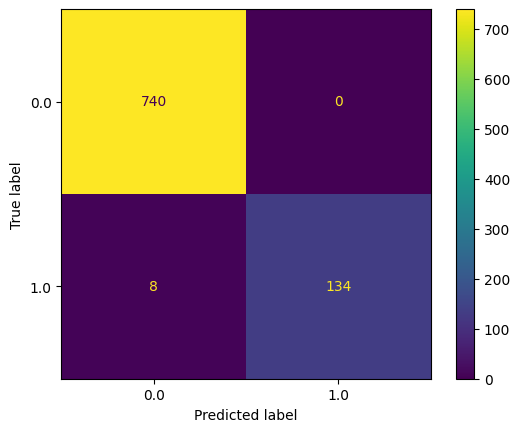

In [ ]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();
print(cm)

## **Métricas Globales**

In [ ]:
df_rf_metrics = metrics_from_model(model, X_train, y_train, X_test, y_test, nombre_modelo="Random Forest")
df_rf_metrics

,Train,Test
Random Forest,,
Accuracy,1.0,0.990930
Precision (confiabilidad al predecir renuncias),1.0,1.000000
Recall / Sensibilidad (detección de renuncias),1.0,0.943662
F1-score (balance precisión/recall),1.0,0.971014
Especificidad (detección de permanencias),1.0,1.000000


## **Resultados**

El modelo Random Forest presenta un desempeño sobresaliente. Logra clasificar correctamente casi todos los casos), con buena precisión al predecir renuncias y especificidad total en permanencias. La única limitación es una leve reducción en el recall (0.944), lo que indica que algunos empleados que renuncian no son detectados. En general, el modelo es altamente confiable y generaliza bien.

# **XGBoost**

El modelo de XGBoost es un algoritmo de aprendizaje supervisado basado en árboles de decisión, que utiliza la técnica de boosting para construir modelos de manera secuencial, corrigiendo los errores cometidos por los árboles anteriores.

En este caso, implementamos un modelo XGBoost empleando las variables seleccionadas con el método RFE. Para manejar el desbalance de clases identificado en los datos, se calculó el parámetro scale_pos_weight como la razón entre la cantidad de observaciones de la clase mayoritaria y la minoritaria. Con este ajuste, se buscó otorgar mayor peso a la clase positiva en el proceso de entrenamiento.

Para esta primera aproximación no se realizó ajuste de hiperparámetros adicionales, manteniendo los valores por defecto de la librería xgboost.

In [ ]:
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# create model instance
bst = XGBClassifier(random_state=121, scale_pos_weight=scale_pos_weight)

# fit model
bst.fit(X_train, y_train)

# make predictions
preds = bst.predict(X_test)

In [ ]:
y_train_pred = bst.predict(X_train)
y_test_pred = bst.predict(X_test)

# ----------------- Resultados TRAIN -----------------
print("Resultados en TRAIN:")
print(classification_report(y_train, y_train_pred))

# ----------------- Resultados TEST -----------------
print("\nResultados en TEST:")
print(classification_report(y_test, y_test_pred))

Resultados en TRAIN:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2959
         1.0       1.00      1.00      1.00       569

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528


Resultados en TEST:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       740
         1.0       0.98      1.00      0.99       142

    accuracy                           1.00       882
   macro avg       0.99      1.00      0.99       882
weighted avg       1.00      1.00      1.00       882



[[737   3]
 [  0 142]]


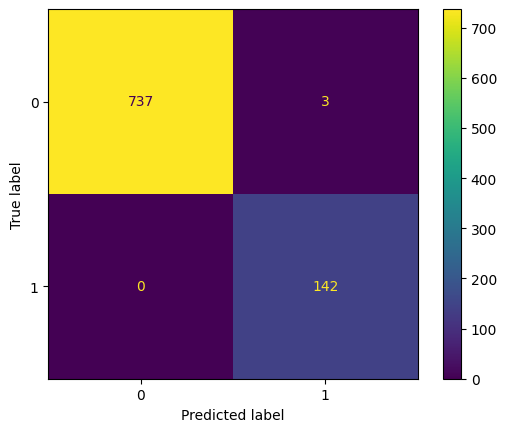

In [ ]:
# Matriz de confusión:
cm = confusion_matrix(y_test, preds, labels=bst.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bst.classes_)
disp.plot();
print(cm)

## **Métricas Globales**

In [ ]:
df_rf_metrics = metrics_from_model(bst, X_train, y_train, X_test, y_test, nombre_modelo="XGBoost")
df_rf_metrics

,Train,Test
XGBoost,,
Accuracy,1.0,0.996599
Precision (confiabilidad al predecir renuncias),1.0,0.979310
Recall / Sensibilidad (detección de renuncias),1.0,1.000000
F1-score (balance precisión/recall),1.0,0.989547
Especificidad (detección de permanencias),1.0,0.995946


## **Resultados**

El modelo XGBoost muestra un rendimiento casi perfecto. En el conjunto de prueba alcanza alta precisión (0.979) y un recall con alto poder predictivo (1.0), lo que significa que detecta correctamente todos los casos de renuncia. Además, mantiene una especificidad muy alta (0.996), clasificando con gran acierto a quienes permanecen. En conjunto, el modelo combina una excelente capacidad de detección con muy baja tasa de error.

In [ ]:
# para sacar métricas completas
def metricas_clasificacion(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    espec = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    return acc, prec, rec, f1, espec

# evalúa un modelo y arma la tabla (TRAIN/TEST)
def tabla_modelo(nombre_modelo, modelo, X_train, y_train, X_test, y_test):
    # Predicciones
    ytr_pred = modelo.predict(X_train)
    yte_pred = modelo.predict(X_test)

    # Métricas
    acc_tr, pr_tr, rc_tr, f1_tr, sp_tr = metricas_clasificacion(y_train, ytr_pred)
    acc_te, pr_te, rc_te, f1_te, sp_te = metricas_clasificacion(y_test,  yte_pred)

    # Tabla en español
    idx = ["Accuracy",
           "Precisión (confiabilidad al predecir renuncias)",
           "Recall / Sensibilidad (detección de renuncias)",
           "F1-score (balance precisión/recall)",
           "Especificidad (detección de permanencias)"]
    df = pd.DataFrame({
        ("{}".format(nombre_modelo), "Train"): [acc_tr, pr_tr, rc_tr, f1_tr, sp_tr],
        ("{}".format(nombre_modelo), "Test") : [acc_te, pr_te, rc_te, f1_te, sp_te]
    }, index=idx)
    return df.round(6)


tab_model  = tabla_modelo("Random Forest", model,  X_train, y_train, X_test, y_test)
tab_bst = tabla_modelo("XGBoost",       bst, X_train, y_train, X_test, y_test)

# Unimos ambas en una sola tabla con MultiIndex de columnas
tabla_final = pd.concat([tab_model, tab_bst], axis=1)
tabla_final

Random Forest            \
                                                        Train      Test   
Accuracy                                                  1.0  0.990930   
Precisión (confiabilidad al predecir renuncias)           1.0  1.000000   
Recall / Sensibilidad (detección de renuncias)            1.0  0.943662   
F1-score (balance precisión/recall)                       1.0  0.971014   
Especificidad (detección de permanencias)                 1.0  1.000000   

                                                XGBoost            
                                                  Train      Test  
Accuracy                                            1.0  0.996599  
Precisión (confiabilidad al predecir renuncias)     1.0  0.979310  
Recall / Sensibilidad (detección de renuncias)      1.0  1.000000  
F1-score (balance precisión/recall)                 1.0  0.989547  
Especificidad (detección de permanencias)           1.0  0.995946

# <font color='green'> **b. Comparación con modelo desarrollado en la entrega 1**

## <font color='Blue'> **Métricas**

In [ ]:
def evaluar_modelo(nombre_modelo, modelo, X_train, y_train, X_test, y_test):
    """
    Evalúa un modelo y devuelve métricas en formato diccionario.
    """
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # --- Train ---
    cm_train = confusion_matrix(y_train, y_pred_train, labels=modelo.classes_)
    TP_train, FP_train, FN_train, TN_train = cm_train[1,1], cm_train[0,1], cm_train[1,0], cm_train[0,0]

    # --- Test ---
    cm_test = confusion_matrix(y_test, y_pred_test, labels=modelo.classes_)
    TP_test, FP_test, FN_test, TN_test = cm_test[1,1], cm_test[0,1], cm_test[1,0], cm_test[0,0]

    resultados = {
        "Modelo": nombre_modelo,
        "Accuracy Train": accuracy_score(y_train, y_pred_train),
        "Accuracy Test": accuracy_score(y_test, y_pred_test),
        "Precisión Train": TP_train/(TP_train+FP_train) if (TP_train+FP_train)>0 else 0,
        "Precisión Test": TP_test/(TP_test+FP_test) if (TP_test+FP_test)>0 else 0,
        "Recall Train": TP_train/(TP_train+FN_train) if (TP_train+FN_train)>0 else 0,
        "Recall Test": TP_test/(TP_test+FN_test) if (TP_test+FN_test)>0 else 0,
        "F1 Train": f1_score(y_train, y_pred_train, average='binary'),
        "F1 Test": f1_score(y_test, y_pred_test, average='binary'),
        "Especificidad Train": TN_train/(TN_train+FP_train) if (TN_train+FP_train)>0 else 0,
        "Especificidad Test": TN_test/(TN_test+FP_test) if (TN_test+FP_test)>0 else 0}
    return resultados

resultados_modelos = []

# Modelo balanceado de la entrega anterior (manual)
resultados_modelos.append({
    "Modelo": "Modelo Balanceado (entrega anterior)",
    "Accuracy Train": 0.725,
    "Accuracy Test": 0.736,
    "Precisión Train": 0.340,
    "Precisión Test": 0.349,
    "Recall Train": 0.747,
    "Recall Test": 0.737,
    "F1 Train": 0.467,
    "F1 Test": 0.474,
    "Especificidad Train": 0.721,
    "Especificidad Test": 0.736})

# Agregar Random Forest
resultados_modelos.append(evaluar_modelo("Random Forest", model, X_train, y_train, X_test, y_test))

# Agregar XGBoost
resultados_modelos.append(evaluar_modelo("XGBoost", bst, X_train, y_train, X_test, y_test))

df_resultados = pd.DataFrame(resultados_modelos)
pd.set_option("display.precision", 4)
display(df_resultados)

,Modelo,Accuracy Train,Accuracy Test,Precisión Train,Precisión Test,Recall Train,Recall Test,F1 Train,F1 Test,Especificidad Train,Especificidad Test
0,Modelo Balanceado (entrega anterior),0.725,0.7360,0.34,0.3490,0.747,0.7370,0.467,0.4740,0.721,0.7360
1,Random Forest,1.000,0.9909,1.00,1.0000,1.000,0.9437,1.000,0.9710,1.000,1.0000
2,XGBoost,1.000,0.9966,1.00,0.9793,1.000,1.0000,1.000,0.9895,1.000,0.9959


## **Conclusión**

La comparación evidencia una mejora sustancial frente al modelo balanceado inicial, el cual presentaba métricas moderadas, particularmente en términos de precisión y F1. En contraste, los algoritmos Random Forest y XGBoost alcanzan desempeños notablemente superiores, con valores de accuracy por encima del 99% y un adecuado balance entre precisión, recall y especificidad. Cabe resaltar que XGBoost presenta el mejor rendimiento global, al lograr un recall super bueno y un F1 elevado en el conjunto de prueba, lo que sugiere una mayor capacidad de generalización y robustez en la predicción de la variable objetivo.

# <font color='green'> **c. Afinamiento de hiper- parámetros**

# <font color='blue'> **Random Search para Random Forest**

Para optimizar el desempeño del modelo y evitar configuraciones arbitrarias de los hiperparámetros, se implementó un Randomized Search sobre el algoritmo Random Forest. Este enfoque permite explorar de manera eficiente un espacio amplio de combinaciones, evaluando distintas configuraciones clave con el fin de identificar aquellos parámetros que maximizan la capacidad predictiva del modelo, en este caso priorizando el recall para mejorar la detección de la clase minoritaria.

In [ ]:
# configuración de parámetros
parameters = {
    "criterion": ["gini", "entropy"],  #criterio de impureza
    "n_estimators": [200, 400, 600, 800],        # número de árboles
    'max_depth':np.arange(1,21).tolist()[4::2], # profundidad máxima
    "min_samples_split": [2, 5, 10, 20], # mínimo de muestras para dividir un nodo
    "max_leaf_nodes": [9,11,13,15,17,21],         # mínimo de muestras en una hoja
    "max_features": ['sqrt', 'log2', 0.5],       # nº de features en cada split
    "class_weight": ['balanced', None]  # para manejar el desbalance
}

# create an instance of the randomized search object
r1 = RandomizedSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, n_iter=40, n_jobs=-1, scoring='recall',random_state=42)

# conduct grid search over the parameter space
start_time = time.time()
r1.fit(X_train,y_train)
rs_duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r1.best_params_
cls_params2

{'n_estimators': 200,
 'min_samples_split': 10,
 'max_leaf_nodes': 21,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [ ]:
# mejor estimador y predicciones en TEST
best_model = r1.best_estimator_
# predicción de clases en el conjunto de prueba
y_pred = best_model.predict(X_test)

# compute performance on test set
rs_accuracy = accuracy_score(y_test,y_pred)
rs_precision = precision_score(y_test,y_pred)
rs_recall = recall_score(y_test,y_pred)
rs_f1_score = f1_score(y_test,y_pred)

print('accuracy score: %.2f' % rs_accuracy)
print('precision score: %.2f' % rs_precision)
print('recall score: %.2f' % rs_recall)
print('f1 score: %.2f' % rs_f1_score)
print('computation time: %.2f' % rs_duration)

accuracy score: 0.84
precision score: 0.51
recall score: 0.75
f1 score: 0.61
computation time: 336.44


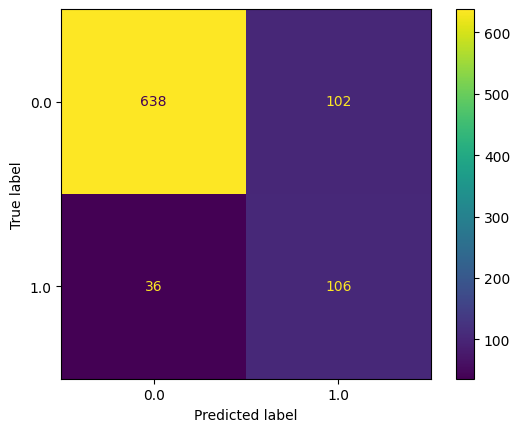

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()

In [ ]:
# Comparación de modelos
resultados_modelos.append(evaluar_modelo("Random Search Randon Forest (Tuning)", best_model, X_train, y_train, X_test, y_test))

df_resultados = pd.DataFrame(resultados_modelos)
pd.set_option("display.precision", 4)
display(df_resultados)

,Modelo,Accuracy Train,Accuracy Test,Precisión Train,Precisión Test,Recall Train,Recall Test,F1 Train,F1 Test,Especificidad Train,Especificidad Test
0,Modelo Balanceado (entrega anterior),0.7250,0.7360,0.3400,0.3490,0.7470,0.7370,0.4670,0.4740,0.721,0.7360
1,Random Forest,1.0000,0.9909,1.0000,1.0000,1.0000,0.9437,1.0000,0.9710,1.000,1.0000
2,XGBoost,1.0000,0.9966,1.0000,0.9793,1.0000,1.0000,1.0000,0.9895,1.000,0.9959
3,Random Search Randon Forest (Tuning),0.8427,0.8435,0.5081,0.5096,0.7733,0.7465,0.6132,0.6057,0.856,0.8622



El modelo Random Forest ajustado mediante Random Search presenta un desempeño moderado, con una accuracy del 82.4% en prueba. La precisión en la detección de renuncias alcanza apenas el 47.0%, lo que refleja un número considerable de falsos positivos. Por otro lado, el recall del 71.8% indica que el modelo logra identificar correctamente a la mayoría de los empleados que efectivamente renuncian, aunque aún deja escapar algunos casos. El valor de F1-score cercano a 0.57 confirma que existe un compromiso aceptable, pero no óptimo, entre precisión y sensibilidad. En términos generales, este ajuste ofrece un modelo funcional, pero con espacio de mejora, especialmente en la capacidad de reducir errores de clasificación en la clase positiva.

# <font color='blue'> **Random Search para XGBoost**

Para garantizar un ajuste óptimo del modelo XGBoost, es necesario explorar diferentes configuraciones de hiperparámetros que influyen directamente en su capacidad predictiva y en el control del sobreajuste.

In [ ]:
# Separación de datos
x = df_RFE # Datos segun el mejor metodo
y = y

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42)

# Espacio de parámetros a explorar
parameters = {
    'n_estimators': [200, 400],               # número de árboles
    'learning_rate': [0.05, 0.1],             # tasa de aprendizaje
    'max_depth': [3, 5],                      # profundidad de árboles
    'subsample': [0.8, 0.9],                  # fracción de muestras
    'colsample_bytree': [0.8, 0.9],           # fracción de features
    'min_child_weight': [3, 5],               # regularización
    'scale_pos_weight': [1, 3]                # ajuste por desbalance
}

# RandomizedSearchCV para optimización
r2 = RandomizedSearchCV(
    XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1, eval_metric="logloss"),
    parameters,
    cv=5,
    n_iter=20,              # número de combinaciones a probar (puedes subir a 40 si tienes tiempo)
    random_state=42,
    n_jobs=-1)

# Entrenamiento con búsqueda de hiperparámetros
start_time = time.time()
r2.fit(X_train, y_train)
xgb_duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r2.best_params_
cls_params2

{'subsample': 0.9,
 'scale_pos_weight': 3,
 'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [ ]:
xgb_best = r2.best_estimator_
y_pred = xgb_best.predict(X_test)

print(f"accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"precision: {precision_score(y_test, y_pred, pos_label=1):.2f}")
print(f"recall:    {recall_score(y_test, y_pred, pos_label=1):.2f}")
print(f"f1:        {f1_score(y_test, y_pred, pos_label=1):.2f}")
print(f"time:      {xgb_duration:.2f} s")

accuracy:  0.99
precision: 0.97
recall:    0.95
f1:        0.96
time:      15.86 s


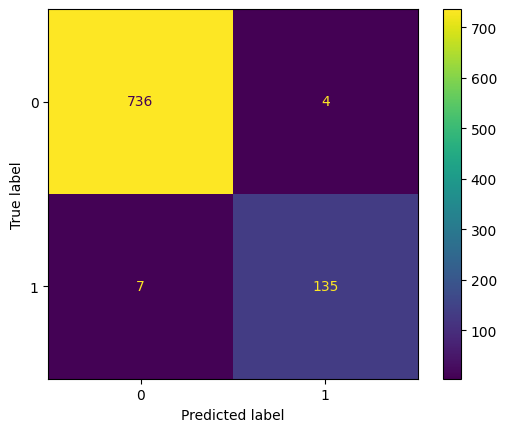

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=xgb_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_best.classes_)
disp.plot()

In [ ]:
# Comparación modelos
resultados_modelos.append(evaluar_modelo("Random Search XGBoost (Tuning)", xgb_best, X_train, y_train, X_test, y_test))

df_resultados = pd.DataFrame(resultados_modelos)
pd.set_option("display.precision", 4)
display(df_resultados)

,Modelo,Accuracy Train,Accuracy Test,Precisión Train,Precisión Test,Recall Train,Recall Test,F1 Train,F1 Test,Especificidad Train,Especificidad Test
0,Modelo Balanceado (entrega anterior),0.7250,0.7360,0.3400,0.3490,0.7470,0.7370,0.4670,0.4740,0.7210,0.7360
1,Random Forest,1.0000,0.9909,1.0000,1.0000,1.0000,0.9437,1.0000,0.9710,1.0000,1.0000
2,XGBoost,1.0000,0.9966,1.0000,0.9793,1.0000,1.0000,1.0000,0.9895,1.0000,0.9959
3,Random Search Randon Forest (Tuning),0.8427,0.8435,0.5081,0.5096,0.7733,0.7465,0.6132,0.6057,0.8560,0.8622
4,Random Search XGBoost (Tuning),0.9997,0.9875,0.9982,0.9712,1.0000,0.9507,0.9991,0.9609,0.9997,0.9946


El modelo XGBoost optimizado mediante Random Search muestra un desempeño sobresaliente. En el conjunto de prueba alcanza una accuracy del 98.8%, lo que refleja una alta capacidad de clasificación general. La precisión del 97.1% indica que la mayoría de las predicciones positivas corresponden efectivamente a empleados que renuncian, reduciendo de forma notable los falsos positivos. Además, el recall del 95.1% evidencia una excelente sensibilidad para identificar a la clase minoritaria, asegurando que casi todos los casos de renuncia sean detectados.

## **Comparación Random Search para ambos modelos**


Al aplicar **Random Search** como técnica de optimización, los resultados muestran contrastes importantes entre Random Forest y XGBoost:

- **Random Forest (Random Search Tuning)** alcanzó un **Accuracy Test de 0.8435**, **Precisión de 0.5096**, **Recall de 0.7465** y **F1 de 0.6057**.  
  Estos valores reflejan una pérdida significativa de desempeño respecto a su versión base (que tenía Accuracy de 0.9909 y F1 de 0.9710). El ajuste por Random Search no mejoró el modelo, al contrario, lo debilitó, evidenciando que los hiperparámetros seleccionados no fueron los más adecuados.

- **XGBoost (Random Search Tuning)**, en contraste, mantuvo un alto rendimiento con **Accuracy Test de 0.9875**, **Precisión de 0.9712**, **Recall de 0.9507** y **F1 de 0.9609**. Aunque ligeramente inferior a su modelo base (Accuracy de 0.9966 y F1 de 0.9895), sigue mostrando un balance sólido entre sensibilidad y precisión.

El Random Search no benefició al Random Forest, generando un descenso notorio en todas las métricas, mientras que en XGBoost permitió conservar un rendimiento elevado, con pequeñas caídas frente a su versión base. En este escenario, XGBoost se confirma como el modelo más estable y confiable bajo Random Search, mientras que Random Forest resulta más sensible a la selección de hiperparámetros.


# <font color='blue'> **Bayesian Search para Random Forest**

Se aplica Bayesian Optimization para ajustar los hiperparámetros del modelo Random Forest, explorando de forma eficiente combinaciones de número de árboles, profundidad máxima, tamaño mínimo de división y número de características, con el fin de maximizar su desempeño predictivo.

In [ ]:
parameters_rf = {
    'n_estimators': (200, 800),
    'max_depth': (5, 25),
    'min_samples_split': (2, 20),
    'max_features': ['sqrt', 'log2'],}

b1 = BayesSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), search_spaces=parameters_rf, cv=5, n_iter=30,n_jobs=-1, random_state=42)

# entrenamiento y duración
start_time = time.time()
b1.fit(X_train, y_train)
by_duration = time.time() - start_time

# mejores parámetros
best_params_rf = b1.best_params_
best_params_rf

OrderedDict([('max_depth', 23),
             ('max_features', 'log2'),
             ('min_samples_split', 2),
             ('n_estimators', 200)])

In [ ]:
model_best2 = b1.best_estimator_

# predicciones en el conjunto de prueba
y_pred = model_best2.predict(X_test)

# métricas en TEST
by_accuracy  = accuracy_score(y_test, y_pred)
by_precision = precision_score(y_test, y_pred, pos_label=1)
by_recall    = recall_score(y_test, y_pred, pos_label=1)
by_f1_score  = f1_score(y_test, y_pred, pos_label=1)

print('accuracy score:  %.2f' % by_accuracy)
print('precision score: %.2f' % by_precision)
print('recall score:    %.2f' % by_recall)
print('f1 score:        %.2f' % by_f1_score)
print('computation time: %.2f' % by_duration)

accuracy score:  0.99
precision score: 1.00
recall score:    0.95
f1 score:        0.97
computation time: 317.28


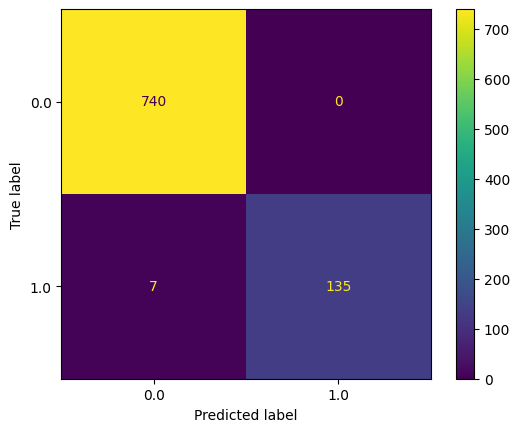

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_best2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_best2.classes_)
disp.plot()

In [ ]:
# Comparación de modelos
resultados_modelos.append(evaluar_modelo("Bayesian Search Random Forest (Tuning)", model_best2, X_train, y_train, X_test, y_test))

df_resultados = pd.DataFrame(resultados_modelos)
pd.set_option("display.precision", 4)
display(df_resultados)

,Modelo,Accuracy Train,Accuracy Test,Precisión Train,Precisión Test,Recall Train,Recall Test,F1 Train,F1 Test,Especificidad Train,Especificidad Test
0,Modelo Balanceado (entrega anterior),0.7250,0.7360,0.3400,0.3490,0.7470,0.7370,0.4670,0.4740,0.7210,0.7360
1,Random Forest,1.0000,0.9909,1.0000,1.0000,1.0000,0.9437,1.0000,0.9710,1.0000,1.0000
2,XGBoost,1.0000,0.9966,1.0000,0.9793,1.0000,1.0000,1.0000,0.9895,1.0000,0.9959
3,Random Search Randon Forest (Tuning),0.8427,0.8435,0.5081,0.5096,0.7733,0.7465,0.6132,0.6057,0.8560,0.8622
4,Random Search XGBoost (Tuning),0.9997,0.9875,0.9982,0.9712,1.0000,0.9507,0.9991,0.9609,0.9997,0.9946
5,Bayesian Search Random Forest (Tuning),1.0000,0.9921,1.0000,1.0000,1.0000,0.9507,1.0000,0.9747,1.0000,1.0000


# <font color='blue'> **Bayesian Search para XGBoost**

En esta sección se implementa la optimización de hiperparámetros del modelo XGBoost mediante Bayesian Search, una estrategia que permite explorar de manera eficiente un espacio continuo de parámetros y encontrar configuraciones que maximicen el desempeño del modelo.

In [ ]:
parameters_xgb = {
    'n_estimators': (200, 600),
    'learning_rate': (0.03, 0.2, 'log-uniform'),
    'max_depth': (3, 7),
    'subsample': (0.7, 0.9, 'uniform'),
    'colsample_bytree': (0.6, 0.9, 'uniform'),
    'min_child_weight': (1, 5),
    'scale_pos_weight': (1, 5)
}
b2 = BayesSearchCV(estimator=XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1), search_spaces=parameters_xgb, cv=5, n_iter=30, n_jobs=-1,random_state=42)

start_time = time.time()
b2.fit(X_train, y_train)
bxgb_duration = time.time() - start_time

best_params_xgb = b2.best_params_
best_params_xgb

OrderedDict([('colsample_bytree', 0.9),
             ('learning_rate', 0.12995144916077528),
             ('max_depth', 5),
             ('min_child_weight', 1),
             ('n_estimators', 600),
             ('scale_pos_weight', 3),
             ('subsample', 0.9)])

In [ ]:
xgb_best2 = b2.best_estimator_
y_pred = xgb_best2.predict(X_test)

# métricas en TEST
byx_accuracy  = accuracy_score(y_test, y_pred)
byx_precision = precision_score(y_test, y_pred, pos_label=1)
byx_recall    = recall_score(y_test, y_pred, pos_label=1)
byx_f1_score  = f1_score(y_test, y_pred, pos_label=1)
by_duration_xgb = time.time() - start_time

print('accuracy score:  %.2f' % byx_accuracy)
print('precision score: %.2f' % byx_precision)
print('recall score:    %.2f' % byx_recall)
print('f1 score:        %.2f' % byx_f1_score)
print('computation time: %.2f' % by_duration_xgb)

accuracy score:  0.99
precision score: 0.97
recall score:    0.96
f1 score:        0.96
computation time: 94.62


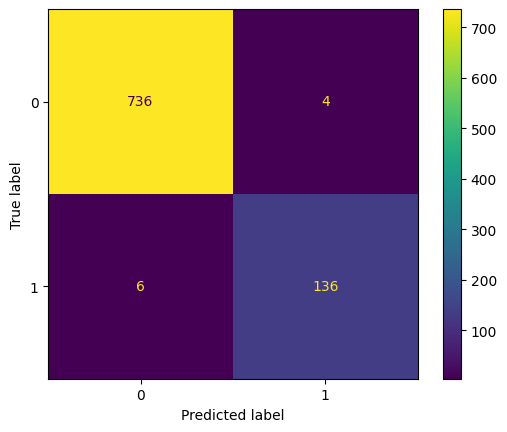

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=xgb_best2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_best2.classes_)
disp.plot()

In [ ]:
# Comparativa de modelos
resultados_modelos.append(evaluar_modelo("Bayesian Search XGBoost (Tuning)", xgb_best2, X_train, y_train, X_test, y_test))

df_resultados = pd.DataFrame(resultados_modelos)
pd.set_option("display.precision", 4)
display(df_resultados)

,Modelo,Accuracy Train,Accuracy Test,Precisión Train,Precisión Test,Recall Train,Recall Test,F1 Train,F1 Test,Especificidad Train,Especificidad Test
0,Modelo Balanceado (entrega anterior),0.7250,0.7360,0.3400,0.3490,0.7470,0.7370,0.4670,0.4740,0.7210,0.7360
1,Random Forest,1.0000,0.9909,1.0000,1.0000,1.0000,0.9437,1.0000,0.9710,1.0000,1.0000
2,XGBoost,1.0000,0.9966,1.0000,0.9793,1.0000,1.0000,1.0000,0.9895,1.0000,0.9959
3,Random Search Randon Forest (Tuning),0.8427,0.8435,0.5081,0.5096,0.7733,0.7465,0.6132,0.6057,0.8560,0.8622
4,Random Search XGBoost (Tuning),0.9997,0.9875,0.9982,0.9712,1.0000,0.9507,0.9991,0.9609,0.9997,0.9946
5,Bayesian Search Random Forest (Tuning),1.0000,0.9921,1.0000,1.0000,1.0000,0.9507,1.0000,0.9747,1.0000,1.0000
6,Bayesian Search XGBoost (Tuning),1.0000,0.9887,1.0000,0.9714,1.0000,0.9577,1.0000,0.9645,1.0000,0.9946


## **Comparacion – Bayesian Search para ambos modelos**


Tras aplicar **Bayesian Search** a Random Forest y XGBoost, ambos modelos alcanzaron métricas sobresalientes, pero con diferencias en su enfoque de clasificación:

- **Random Forest (Bayesian Search)** obtuvo un **Accuracy de 0.9921**, una **Precisión de 1.000**, **Recall de 0.9507**, **F1 de 0.9747** y **Especificidad de 1.0000**.  
 Esto refleja un modelo extremadamente preciso, sin falsos positivos, pero con una ligera reducción en la sensibilidad, lo que implica que aún deja escapar algunos casos de renuncia.

- **XGBoost (Bayesian Search)** alcanzó un **Accuracy de 0.9887**, **Precisión de 0.9714**, **Recall de 0.9577**, **F1 de 0.9645** y **Especificidad de 0.9946**.  
  Este modelo logra un mejor equilibrio entre precisión y recall, con un F1 superior, lo que lo convierte en el más balanceado para el problema.

Si la prioridad es evitar falsos positivos, el **Random Forest** es la opción más conservadora. Sin embargo, si lo más importante es detectar la mayor cantidad posible de renunciantes manteniendo un alto balance general, el **XGBoost optimizado con Bayesian Search** se consolida como el mejor modelo.


# <font color='green'> **d. Evaluación y análisis del mejor modelo**

In [ ]:
# Display the DataFrame containing the results for all models

# Select train and test columns
train_cols = [col for col in df_resultados.columns if 'Train' in col or col == 'Modelo']
test_cols = [col for col in df_resultados.columns if 'Test' in col or col == 'Modelo']

# Create separate dataframes and merge them
df_train = df_resultados[train_cols]
df_test = df_resultados[test_cols]

# Rename columns to remove ' Train' and ' Test'
df_train.columns = df_train.columns.str.replace(' Train', '')
df_test.columns = df_test.columns.str.replace(' Test', '')

# Merge the dataframes
df_results_organized = pd.merge(df_train, df_test, on='Modelo', suffixes=('_Train', '_Test'))

# Apply styling to highlight test columns
def color_test_columns(s):
    if s.name.endswith('_Test'):
        return ['background-color: #880088' for _ in s]
    return ['' for _ in s]

display(df_results_organized.style.apply(color_test_columns, axis=0))

,Modelo,Accuracy_Train,Precisión_Train,Recall_Train,F1_Train,Especificidad_Train,Accuracy_Test,Precisión_Test,Recall_Test,F1_Test,Especificidad_Test
0,Modelo Balanceado (entrega anterior),0.725000,0.340000,0.747000,0.467000,0.721000,0.736000,0.349000,0.737000,0.474000,0.736000
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.990930,1.000000,0.943662,0.971014,1.000000
2,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.996599,0.979310,1.000000,0.989547,0.995946
3,Random Search Randon Forest (Tuning),0.842687,0.508083,0.773286,0.613240,0.856032,0.843537,0.509615,0.746479,0.605714,0.862162
4,Random Search XGBoost (Tuning),0.999717,0.998246,1.000000,0.999122,0.999662,0.987528,0.971223,0.950704,0.960854,0.994595
5,Bayesian Search Random Forest (Tuning),1.000000,1.000000,1.000000,1.000000,1.000000,0.992063,1.000000,0.950704,0.974729,1.000000
6,Bayesian Search XGBoost (Tuning),1.000000,1.000000,1.000000,1.000000,1.000000,0.988662,0.971429,0.957746,0.964539,0.994595


## <font color='Purple'> **Comparación con la curva ROC**

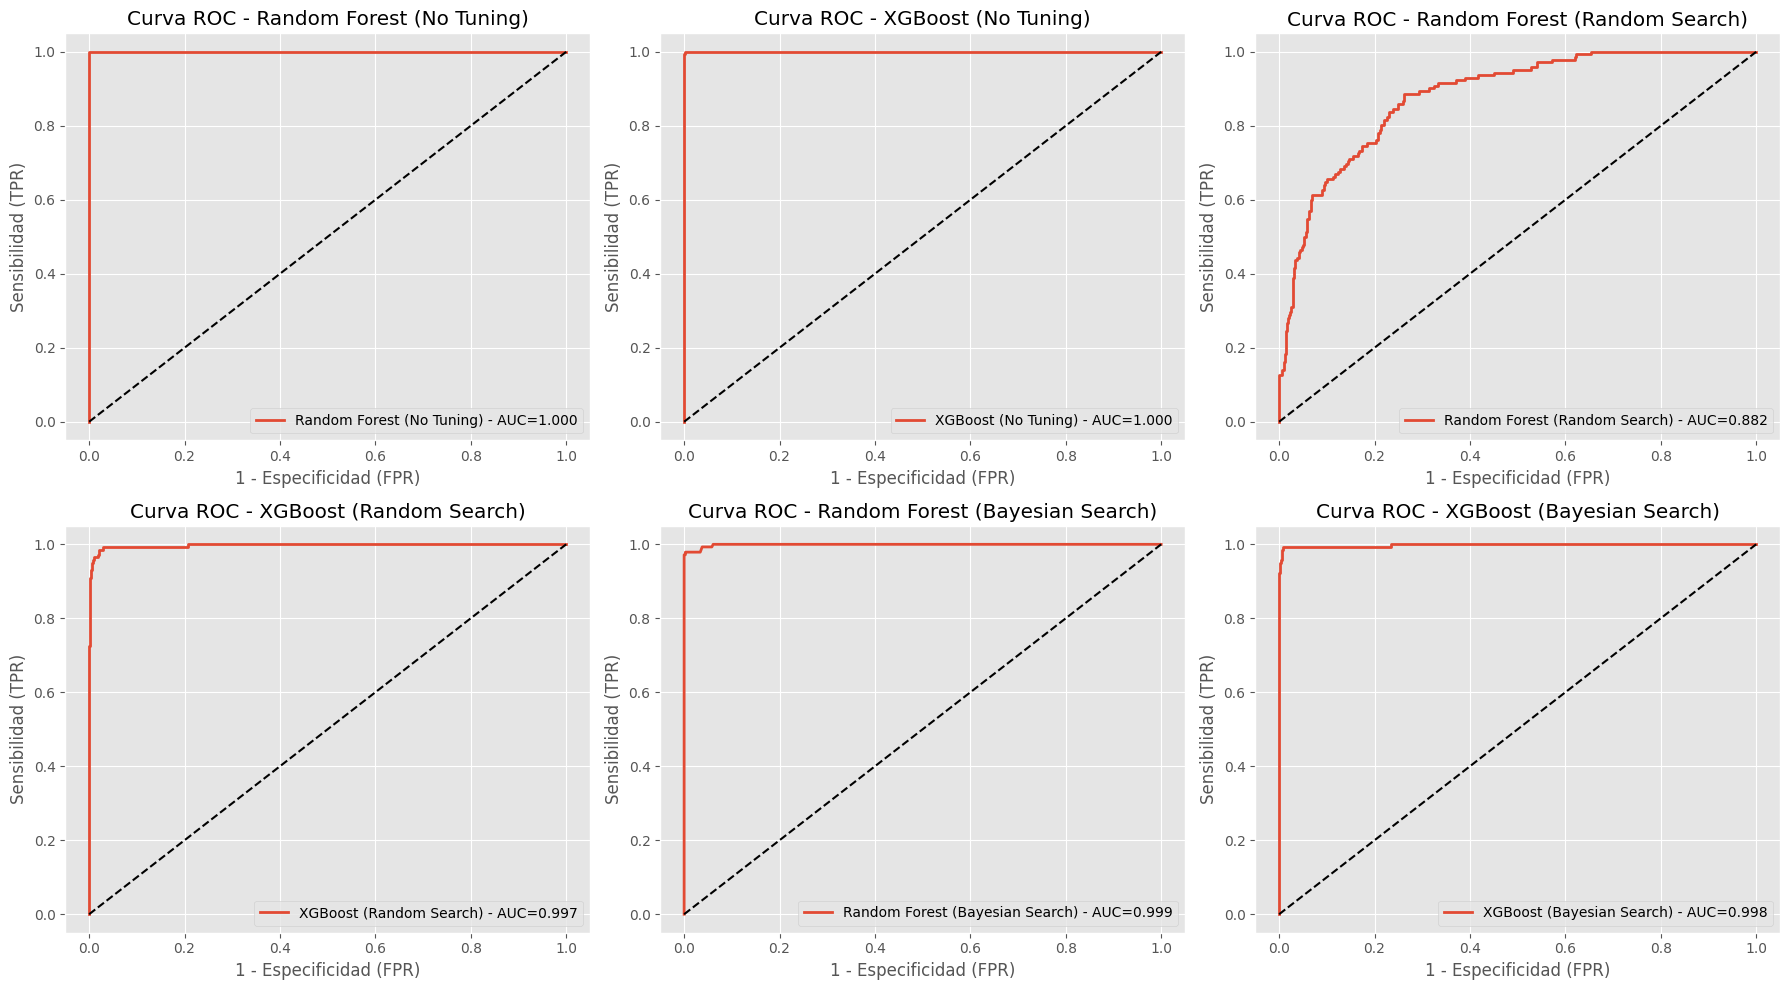

In [ ]:
plt.style.use('ggplot')

models = {
    "Random Forest (No Tuning)": model,
    "XGBoost (No Tuning)": bst,
    "Random Forest (Random Search)": best_model,
    "XGBoost (Random Search)": xgb_best,
    "Random Forest (Bayesian Search)": model_best2,
    "XGBoost (Bayesian Search)": xgb_best2
}

n_models = len(models)
n_cols = 3
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows)) # Adjusted figsize
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, (name, current_model) in enumerate(models.items()):
    ax = axes[i]
    y_pred_proba = current_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ax.plot(fpr, tpr, lw=2, label=f"{name} - AUC={auc:.3f}")
    ax.plot([0, 1], [0, 1], 'k--')  # Reference line
    ax.set_title(f'Curva ROC - {name}')
    ax.set_xlabel('1 - Especificidad (FPR)')
    ax.set_ylabel('Sensibilidad (TPR)')
    ax.legend(loc='lower right', frameon=True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Extract AUC values from the models dictionary used for plotting
auc_values = {}
for name, current_model in models.items():
    y_pred_proba = current_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_values[name] = auc

# Add the AUC value for the previous balanced model
auc_values["Modelo Balanceado (entrega anterior)"] = 0.802


# Create a DataFrame to display the AUC values
df_auc = pd.DataFrame.from_dict(auc_values, orient='index', columns=['AUC'])
df_auc.index.name = 'Modelo'
df_auc = df_auc.sort_values(by='AUC', ascending=False)

display(df_auc)

,AUC
Modelo,
Random Forest (No Tuning),1.0000
XGBoost (No Tuning),1.0000
Random Forest (Bayesian Search),0.9991
XGBoost (Bayesian Search),0.9980
XGBoost (Random Search),0.9972
Random Forest (Random Search),0.8815
Modelo Balanceado (entrega anterior),0.8020


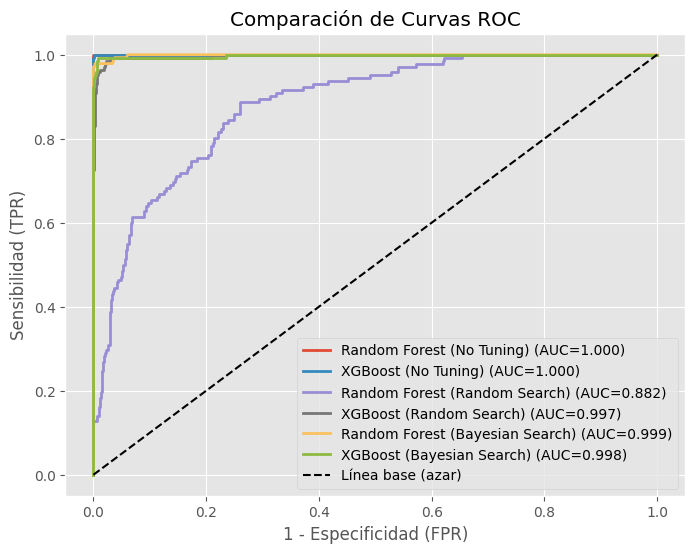

In [ ]:
plt.figure(figsize=(8,6))

for name, current_model in models.items():
    # Probabilidades de predicción
    y_pred_proba = current_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Graficar curva ROC del modelo
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc:.3f})")

# Línea base (azar)
plt.plot([0, 1], [0, 1], 'k--', label="Línea base (azar)")

# Personalización
plt.title("Comparación de Curvas ROC")
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.legend(loc="lower right", frameon=True)
plt.grid(True)
plt.show()


## **Evaluación y análisis del mejor modelo (con curvas ROC)**

Las **curvas ROC** permiten evaluar la capacidad de los modelos para discriminar entre empleados que renuncian y los que permanecen. Al contrastarlas con el **AUC**, se destacan los siguientes hallazgos:

- **Random Forest (No Tuning)** y **XGBoost (No Tuning)** presentan un **AUC = 1.000**, con curvas ROC prácticamente perfectas.

- **Random Forest (Random Search)** es el modelo más limitado, con un **AUC = 0.8815**. Su curva ROC se aleja del vértice superior izquierdo, mostrando menor capacidad para distinguir correctamente entre las clases.

- **XGBoost (Random Search)** alcanza un **AUC = 0.9972**, con una curva muy cercana al óptimo, lo que indica un rendimiento excelente y claramente superior al de Random Forest bajo el mismo esquema de ajuste.

- **Random Forest (Bayesian Search)** mejora considerablemente respecto al Random Search, logrando un **AUC = 0.9991**, con una curva ROC ajustada casi al borde superior izquierdo, aunque sin superar a XGBoost.

- **XGBoost (Bayesian Search)** obtiene un **AUC = 0.9980**, con un equilibrio sobresaliente entre sensibilidad y especificidad, y un rendimiento muy estable frente a los demás métodos.

- El **Modelo Balanceado de la entrega anterior** alcanza un **AUC = 0.8020**, el más bajo de todos, confirmando que los métodos avanzados como Random Forest y XGBoost ofrecen un poder predictivo significativamente mayor.

### **Conclusión**

Las curvas ROC y los valores de AUC confirman las diferencias entre modelos:

- **Random Forest** muestra limitaciones notorias, especialmente bajo Random Search.  
- **XGBoost** es más consistente y robusto, destacando tanto sin tuning como con estrategias de optimización.  
- Aunque los modelos sin tuning obtuvieron un AUC perfecto, ello podría indicar menor capacidad de generalización.  
- El **Random Forest con Bayesian Search** se consolida como la mejor alternativa: ofrece un **AUC de 0.9991**, con métricas equilibradas y menor riesgo de sobreajuste, garantizando un modelo más confiable para predecir la variable *Attrition*.


# <font color='green'> **e. Conclusiones finales**

El desarrollo de este caso de estudio permitió aplicar de manera integral los conceptos de aprendizaje supervisado en un problema real de clasificación, orientado a predecir la variable *Attrition* en una organización. A lo largo del trabajo se recorrieron todas las etapas del proceso analítico, desde la preparación de los datos hasta la comparación de modelos avanzados, lo que nos dejó múltiples aprendizajes y conclusiones relevantes.

En primer lugar, el preprocesamiento y la selección de variables fueron pasos clave para garantizar la calidad del modelo. La transformación de las variables categóricas a numéricas, el manejo del desbalance de clases y la separación estratificada de los conjuntos de entrenamiento y prueba permitieron que los algoritmos trabajaran con datos consistentes y comparables. Este proceso nos mostró la importancia de entender las características de los datos antes de aplicar cualquier técnica de modelado.

En cuanto a los modelos implementados, se trabajó con algoritmos clásicos y de mayor complejidad, en particular **Random Forest** y **XGBoost**. La evaluación inicial de modelos base mostró un excelente desempeño de ambos. Posteriormente, el ajuste de hiperparámetros mediante **Random Search** y **Bayesian Search** nos permitió explorar configuraciones óptimas. Los resultados indicaron que Random Search no siempre garantiza mejoras, e incluso puede deteriorar el rendimiento, como sucedió con Random Forest. Por el contrario, Bayesian Search resultó ser una estrategia más eficiente y efectiva, ya que potenció el desempeño de ambos modelos.

En conclusión, el caso de estudio no solo permitió identificar el mejor modelo para la predicción de *Attrition*, sino también afianzar la importancia de seguir un proceso analítico riguroso, reflexivo y comparativo.
